# Simple Autoencoders on MNIST
## Feedforword NN

In [1]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
import numpy as np
import h5py
from pathlib import Path
import matplotlib.pyplot as plt

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

Using TensorFlow backend.


In [2]:
random_seed = 42
np.random.seed(random_seed)

# Read MNIST data. We won't be using the y_train or y_test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
pixels_per_image = np.prod(X_train.shape[1:])

# Cast values into the current floating-point type
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# Normalize the range from [0,255] to [0,1]
X_train /= 255.
X_test /= 255.

# Reshape the data into a grid with one row per sample, each row 784 (28*28) pixels
X_train = X_train.reshape((len(X_train), pixels_per_image))
X_test = X_test.reshape((len(X_test), pixels_per_image))

print("X_train.shape = ",X_train.shape, " X_test.shape = ",X_test.shape)

X_train.shape =  (60000, 784)  X_test.shape =  (10000, 784)


In [3]:
def draw_predictions_set(predictions):
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.subplot(2, 5, i+6)
        plt.imshow(predictions[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

In [5]:
# Build and train our first autoencoder
num_latent_vars = 20

AE1 = Sequential()
AE1.add(Dense(num_latent_vars, input_dim=pixels_per_image, activation='relu'))
AE1.add(Dense(pixels_per_image, activation='sigmoid'))
AE1.compile(optimizer='adadelta', loss='binary_crossentropy')

weights_filename = "NB2-AE1-weights"
np.random.seed(42)
AE1.fit(X_train, X_train,
        epochs=50, batch_size=128, shuffle=True,
        verbose=2,
        validation_data=(X_test, X_test))
    

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
2s - loss: 0.3315 - val_loss: 0.2626
Epoch 2/50
2s - loss: 0.2452 - val_loss: 0.2257
Epoch 3/50
2s - loss: 0.2145 - val_loss: 0.2024
Epoch 4/50
2s - loss: 0.1959 - val_loss: 0.1874
Epoch 5/50
2s - loss: 0.1836 - val_loss: 0.1772
Epoch 6/50
2s - loss: 0.1745 - val_loss: 0.1690
Epoch 7/50
2s - loss: 0.1668 - val_loss: 0.1620
Epoch 8/50
2s - loss: 0.1602 - val_loss: 0.1561
Epoch 9/50
2s - loss: 0.1549 - val_loss: 0.1514
Epoch 10/50
2s - loss: 0.1505 - val_loss: 0.1472
Epoch 11/50
2s - loss: 0.1467 - val_loss: 0.1436
Epoch 12/50
2s - loss: 0.1435 - val_loss: 0.1405
Epoch 13/50
2s - loss: 0.1406 - val_loss: 0.1378
Epoch 14/50
2s - loss: 0.1380 - val_loss: 0.1353
Epoch 15/50
2s - loss: 0.1357 - val_loss: 0.1330
Epoch 16/50
2s - loss: 0.1336 - val_loss: 0.1309
Epoch 17/50
2s - loss: 0.1316 - val_loss: 0.1291
Epoch 18/50
2s - loss: 0.1299 - val_loss: 0.1275
Epoch 19/50
2s - loss: 0.1283 - val_loss: 0.1260
Epoch 20/50
2s - loss: 0.126

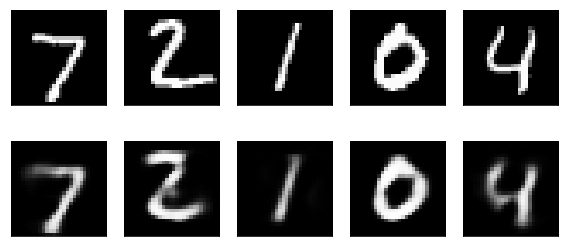

In [6]:
predictions1 = AE1.predict(X_test)
draw_predictions_set(predictions1)

In [7]:
# Build and train our second, more compress-y autoencoder
num_latent_vars = 10

AE2 = Sequential()
AE2.add(Dense(num_latent_vars, input_dim=pixels_per_image, activation='relu'))
AE2.add(Dense(pixels_per_image, activation='sigmoid'))
AE2.compile(optimizer='adadelta', loss='binary_crossentropy')

weights_filename = "NB2-AE2-weights"
np.random.seed(42)
AE2.fit(X_train, X_train,
        epochs=50, batch_size=128, shuffle=True,
        verbose=2,
        validation_data=(X_test, X_test))
   

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
2s - loss: 0.3441 - val_loss: 0.2689
Epoch 2/50
2s - loss: 0.2581 - val_loss: 0.2418
Epoch 3/50
2s - loss: 0.2294 - val_loss: 0.2169
Epoch 4/50
2s - loss: 0.2115 - val_loss: 0.2037
Epoch 5/50
2s - loss: 0.2005 - val_loss: 0.1947
Epoch 6/50
2s - loss: 0.1930 - val_loss: 0.1885
Epoch 7/50
2s - loss: 0.1877 - val_loss: 0.1841
Epoch 8/50
2s - loss: 0.1840 - val_loss: 0.1810
Epoch 9/50
2s - loss: 0.1815 - val_loss: 0.1791
Epoch 10/50
2s - loss: 0.1798 - val_loss: 0.1775
Epoch 11/50
2s - loss: 0.1785 - val_loss: 0.1763
Epoch 12/50
2s - loss: 0.1774 - val_loss: 0.1753
Epoch 13/50
2s - loss: 0.1764 - val_loss: 0.1744
Epoch 14/50
2s - loss: 0.1756 - val_loss: 0.1736
Epoch 15/50
2s - loss: 0.1747 - val_loss: 0.1727
Epoch 16/50
2s - loss: 0.1740 - val_loss: 0.1720
Epoch 17/50
2s - loss: 0.1733 - val_loss: 0.1713
Epoch 18/50
2s - loss: 0.1726 - val_loss: 0.1706
Epoch 19/50
2s - loss: 0.1719 - val_loss: 0.1700
Epoch 20/50
2s - loss: 0.171

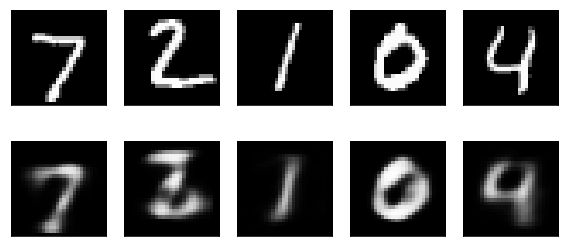

In [8]:
predictions2 = AE2.predict(X_test)
draw_predictions_set(predictions2)

In [11]:
# Build and train our third, super compress-y autoencoder
num_latent_vars = 3

AE3 = Sequential()
AE3.add(Dense(num_latent_vars, input_dim=pixels_per_image, activation='relu'))
AE3.add(Dense(pixels_per_image, activation='sigmoid'))
AE3.compile(optimizer='adadelta', loss='binary_crossentropy')

np.random.seed(42)
AE3.fit(X_train, X_train,
        epochs=50, batch_size=128, shuffle=True,
        verbose=2,
        validation_data=(X_test, X_test))
   

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
2s - loss: 0.3456 - val_loss: 0.2717
Epoch 2/50
2s - loss: 0.2679 - val_loss: 0.2616
Epoch 3/50
2s - loss: 0.2576 - val_loss: 0.2535
Epoch 4/50
2s - loss: 0.2531 - val_loss: 0.2512
Epoch 5/50
1s - loss: 0.2510 - val_loss: 0.2480
Epoch 6/50
1s - loss: 0.2439 - val_loss: 0.2378
Epoch 7/50
2s - loss: 0.2375 - val_loss: 0.2347
Epoch 8/50
1s - loss: 0.2356 - val_loss: 0.2332
Epoch 9/50
1s - loss: 0.2342 - val_loss: 0.2321
Epoch 10/50
1s - loss: 0.2331 - val_loss: 0.2310
Epoch 11/50
1s - loss: 0.2322 - val_loss: 0.2301
Epoch 12/50
1s - loss: 0.2314 - val_loss: 0.2294
Epoch 13/50
1s - loss: 0.2307 - val_loss: 0.2287
Epoch 14/50
2s - loss: 0.2300 - val_loss: 0.2281
Epoch 15/50
2s - loss: 0.2294 - val_loss: 0.2276
Epoch 16/50
2s - loss: 0.2289 - val_loss: 0.2270
Epoch 17/50
2s - loss: 0.2283 - val_loss: 0.2264
Epoch 18/50
1s - loss: 0.2278 - val_loss: 0.2260
Epoch 19/50
1s - loss: 0.2274 - val_loss: 0.2255
Epoch 20/50
1s - loss: 0.226

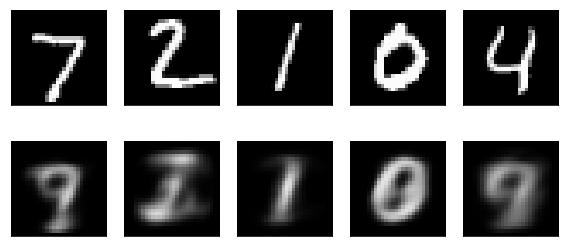

In [12]:
predictions3 = AE3.predict(X_test)
draw_predictions_set(predictions3)

## A better autoencoder

In [13]:
# A deeper autoencoder

num_latent_vars = 20

AE4 = Sequential()
AE4.add(Dense(512, input_dim=pixels_per_image, activation='relu'))
AE4.add(Dense(256, activation='relu'))
AE4.add(Dense(num_latent_vars, activation='relu'))
AE4.add(Dense(256, activation='relu'))
AE4.add(Dense(512, activation='relu'))
AE4.add(Dense(pixels_per_image, activation='sigmoid'))
AE4.compile(optimizer='adadelta', loss='binary_crossentropy')

np.random.seed(42)
AE4.fit(X_train, X_train,
        epochs=50, batch_size=128, shuffle=True,
        verbose=2,
        validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
15s - loss: 0.2926 - val_loss: 0.2354
Epoch 2/50
14s - loss: 0.2120 - val_loss: 0.1906
Epoch 3/50
15s - loss: 0.1824 - val_loss: 0.1728
Epoch 4/50
15s - loss: 0.1660 - val_loss: 0.1582
Epoch 5/50
15s - loss: 0.1543 - val_loss: 0.1490
Epoch 6/50
15s - loss: 0.1456 - val_loss: 0.1405
Epoch 7/50
15s - loss: 0.1383 - val_loss: 0.1327
Epoch 8/50
15s - loss: 0.1317 - val_loss: 0.1268
Epoch 9/50
15s - loss: 0.1268 - val_loss: 0.1213
Epoch 10/50
15s - loss: 0.1229 - val_loss: 0.1190
Epoch 11/50
15s - loss: 0.1195 - val_loss: 0.1159
Epoch 12/50
15s - loss: 0.1167 - val_loss: 0.1137
Epoch 13/50
15s - loss: 0.1147 - val_loss: 0.1123
Epoch 14/50
15s - loss: 0.1128 - val_loss: 0.1104
Epoch 15/50
16s - loss: 0.1111 - val_loss: 0.1099
Epoch 16/50
15s - loss: 0.1099 - val_loss: 0.1078
Epoch 17/50
15s - loss: 0.1084 - val_loss: 0.1070
Epoch 18/50
16s - loss: 0.1073 - val_loss: 0.1046
Epoch 19/50
17s - loss: 0.1062 - val_loss: 0.1041
Epoch 20/

In [ ]:
predictions4 = AE4.predict(X_test)
draw_predictions_set(predictions4)